# Part 0 - Explaining the perceptron

### McCulloch and Pitts model

In order to formalize how the 

<img src="files/mcculloch_pitts.png" width="300" height="300">

# Part 1 
## Building the perceptron (no Keras)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def activation(f):
    '''f is a matrix (N x 1)'''
    return np.where(f>0, 1, 0)

def feed_forward(W, x):
    '''
    network is assumed to be a numpy array (M+1 x N)
    x is a numpy array (1 x M)
    it returns an (N x 1) array
    '''
    return activation(np.dot(np.transpose(W), np.transpose(x)))

# Online training
def train(examples, targets, W, epochs, lr):
    for e in range(epochs):
        for x, t in zip(examples, targets):
            x = np.concatenate((x, [[1]]), axis=1)
            #print("W", W, W.shape)
            #print("x", x, x.shape)
            y = feed_forward(W, x)
            errors = np.subtract(y, t)
            deltas = lr * np.dot(errors, x)
            W = np.subtract(W, np.transpose(deltas))
    return W

def is_output_correct(y, t):
    ''' compares two (N x 1) arrays'''
    return np.array_equal(y,t)

def get_accuracy(examples, targets, W):
    right_answers = 0
    for x, t in zip(examples, targets):
        x = np.concatenate((x, [[1]]), axis=1)
        y = feed_forward(W, x)
        if is_output_correct(y.flatten(), t):
            right_answers += 1
    return right_answers/examples.shape[0]

In [3]:
def plot_decision_boundary():
    plt.xlim(-1, 2)
    plt.ylim(-1, 2)
    plt.scatter(list(map(lambda x: x[0][0], dataset)),
                list(map(lambda x: x[0][1], dataset)),
                c=colors,
                s=50)
    x_decision_hyperplane = list(range(-1,3))
    b = W[-1][0]
    y_decision_hyperplane = list(map(lambda x: (-(W[0][0]/W[1][0])*x -(b/W[1][0])), x_decision_hyperplane))
    print("--------------")
    print("Predictions: ")
    print("Example (x) | Target (t) | Predicted (y)")
    for x, t in zip(dataset, targets):
        x = np.concatenate((x, [[1]]), axis=1)
        print(x, t, feed_forward(W,x))

    plt.plot(x_decision_hyperplane, y_decision_hyperplane, '-.')
    plt.show()

## AND operand network

In [4]:
input_neurons = 2
output_neurons = 1

Trained network weights:  [[ 0.48]
 [ 0.27]
 [-0.55]]
Accuracy:  1.0
--------------
Predictions: 
Example (x) | Target (t) | Predicted (y)
[[0 0 1]] [0] [[0]]
[[0 1 1]] [0] [[0]]
[[1 0 1]] [0] [[0]]
[[1 1 1]] [1] [[1]]


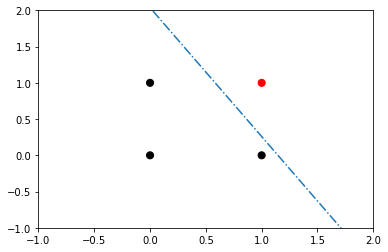

In [5]:
dataset = np.array([[[0, 0]], [[0, 1]], [[1, 0]], [[1, 1]]])
targets = np.array([[0], [0], [0], [1]])
colors = ['black', 'black', 'black','red']

initial_network = np.random.uniform(-1.0, 1.0, (input_neurons+1, output_neurons))
initial_network = np.array([[-0.02], [0.02], [-0.05]])
W = train(dataset, targets, initial_network, epochs=5, lr=0.25)
print("Trained network weights: ", W)
print("Accuracy: ", get_accuracy(dataset, targets, W))
plot_decision_boundary()

## OR operand network

In [6]:
input_neurons = 2
output_neurons = 1

Trained network weights:  [[-0.52]
 [-0.23]
 [ 0.7 ]]
Accuracy:  1.0
--------------
Predictions: 
Example (x) | Target (t) | Predicted (y)
[[0 0 1]] [1] [[1]]
[[0 1 1]] [1] [[1]]
[[1 0 1]] [1] [[1]]
[[1 1 1]] [0] [[0]]


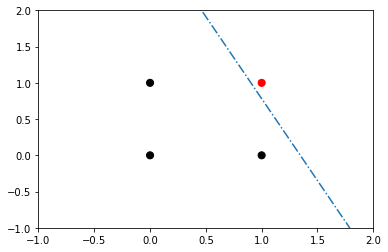

In [7]:
dataset = np.array([[[0, 0]], [[0, 1]], [[1, 0]], [[1, 1]]])
targets = np.array([[1], [1], [1], [0]])
colors = ['black', 'black', 'black','red']

initial_network = np.random.uniform(-1.0, 1.0, (input_neurons+1, output_neurons))
initial_network = np.array([[-0.02], [0.02], [-0.05]])
W = train(dataset, targets, initial_network, epochs=5, lr=0.25)
print("Trained network weights: ", W)
print("Accuracy: ", get_accuracy(dataset, targets, W))
plot_decision_boundary()

## NOT operand network

In [8]:
input_neurons = 1
output_neurons = 1

In [18]:
def plot_decision_boundary_single_input():
    plt.xlim(-1, 2)
    plt.ylim(-1, 2)
    plt.scatter(list(map(lambda x: 0, dataset)),
                list(map(lambda x: x[0][0], dataset)),
                c=colors,
                s=50)
    x_decision_hyperplane = list(range(-1,3))
    b = W[-1][0]
    y_decision_hyperplane = list(map(lambda x: -(b/W[0][0]), x_decision_hyperplane))
    print("--------------")
    print("Predictions: ")
    print("Example (x) | Target (t) | Predicted (y)")
    for x, t in zip(dataset, targets):
        x = np.concatenate((x, [[1]]), axis=1)
        print(x, t, feed_forward(W,x))

    plt.plot(x_decision_hyperplane, y_decision_hyperplane, '-.')
    plt.show()

Trained network weights:  [[-0.45]
 [ 0.2 ]]
Accuracy:  1.0
--------------
Predictions: 
Example (x) | Target (t) | Predicted (y)
[[1 1]] [0] [[0]]
[[0 1]] [1] [[1]]


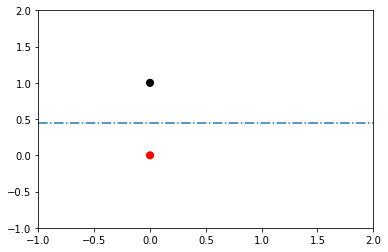

In [24]:
dataset = np.array([[[1]], [[0]]])
targets = np.array([[0], [1]])
colors = ['black', 'red']

initial_network = np.random.uniform(-1.0, 1.0, (input_neurons+1, output_neurons))
initial_network = np.array([[0.8], [0.2]])
W = train(dataset, targets, initial_network, epochs=5, lr=0.25)
print("Trained network weights: ", W)
print("Accuracy: ", get_accuracy(dataset, targets, W))
plot_decision_boundary_single_input()

***
# Part 2 
## Building the perceptron (kind of) in Keras

In [25]:
from keras.models import Sequential
from keras import backend as K
from keras.layers import Dense, Activation
from keras.initializers import glorot_uniform  # Or your initializer of choice
import sklearn.datasets as datasets
from keras.optimizers import SGD
import tensorflow as tf
import keras

Using TensorFlow backend.


In [26]:
input_neurons = 2
output_neurons = 1

In [68]:
dataset = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])
colors = ['black', 'black', 'black','red']

print(dataset.shape)
print(targets.shape)

def binary_activation(x):
    cond = tf.less(x, tf.zeros(tf.shape(x)))
    out = tf.where(cond, tf.zeros(tf.shape(x)), tf.ones(tf.shape(x)))
    return out

def custom_activation(x):
    return (K.sigmoid(x) * 5) - 1

and_network = Sequential([
    Dense(1, input_dim=2, init="one"),#weights=[np.array([[ 0.48], [ 0.27]]), np.array([-0.55])]),
    Activation("relu")
])

and_network.compile(optimizer=SGD(lr = 0.3),
                    loss='mse',
                    metrics=['acc'])

history = and_network.fit(dataset, targets, epochs=10, batch_size=1, verbose=0, shuffle=False)

(4, 2)
(4,)


In [69]:
w, b = and_network.get_weights()
print("weights: ", w)
print("bias: ", b)
print("accuracy: ", history.history['acc'][-1])
print(and_network.get_weights())

weights:  [[1.0295312]
 [1.0045372]]
bias:  [-1.0336664]
accuracy:  1.0
[array([[1.0295312],
       [1.0045372]], dtype=float32), array([-1.0336664], dtype=float32)]


[1.0289975]
[(-1, 2.0538788), (0, 1.0289975), (1, 0.004116416), (2, -1.0207647)]
--------------
Predictions: 
[0 0] 0 [0] [0.]
[0 1] 0 [0] [1.0295312]
[1 0] 0 [0] [1.0295312]
[1 1] 1 [1] [2.0590625]


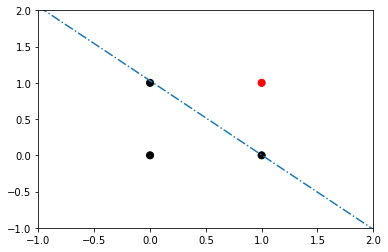

In [70]:
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.scatter(list(map(lambda x: x[0], dataset)),
            list(map(lambda x: x[1], dataset)),
            c=colors,
            s=50)
x_decision_hyperplane = list(range(-1,3))
print(-(w[0]/w[1])*0 -(b/w[1]))
y_decision_hyperplane = list(map(lambda x: (-(w[0]/w[1])*x -(b/w[1]))[0], x_decision_hyperplane))
print(list(zip(x_decision_hyperplane, y_decision_hyperplane)))
predicted = and_network.predict_classes(dataset)
print("--------------")
print("Predictions: ")
for ex, t, ac in zip(dataset, targets, predicted):
    print(ex, t, ac, ex[0]*w[0]+ex[1]*w[0])

plt.plot(x_decision_hyperplane, y_decision_hyperplane, '-.')
plt.show()

#[-0.3442232]
#[(-1, 0.52184135), (0, -0.3442232), (1, -1.2102878), (2, -2.0763524)]
#--------------
#Predictions: 
#[0 0] 0 [0] [0.]
#[0 1] 0 [1] [0.6737635]
#[1 0] 0 [1] [0.6737635]
#[1 1] 1 [1] [1.347527]

# OR operand network

In [ ]:
dataset = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([1, 1, 1, 0])

print(dataset.shape)
print(targets.shape)

or_network = Sequential([
    Dense(1, input_dim=2),
    Activation('sigmoid')
])

or_network.compile(optimizer=SGD(lr = 0.25),
                    loss='mse',
                    metrics=['accuracy'])



#initial_weights = or_network.get_weights()
#with sess.as_default():
#    new_weights = [glorot_uniform()(w.shape).eval() for w in initial_weights]
#or_network.set_weights(new_weights)

or_network.fit(dataset, targets, epochs=100, batch_size=1, verbose=0)

In [ ]:
w, b = and_network.get_weights()
print("weights: ", w)
print("bias: ", b)

In [ ]:
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.scatter(list(map(lambda x: x[0], dataset)),
            list(map(lambda x: x[1], dataset)),
            c=colors,
            s=50)
x_decision_hyperplane = list(range(-1,3))
y_decision_hyperplane = list(map(lambda x: (-(w[0]/w[1])*x -(b/w[1]))[0], x_decision_hyperplane))
print(list(zip(x_decision_hyperplane, y_decision_hyperplane)))
plt.plot(x_decision_hyperplane, y_decision_hyperplane, '-.')
plt.show()

# NOT operand network

In [ ]:
dataset = np.array([0, 1])
targets = np.array([1, 0])

print(dataset.shape)
print(targets.shape)

not_network = Sequential([
    Dense(1, input_dim=1),
    Activation('relu')
])

not_network.compile(optimizer=SGD(lr = 0.5),
                    loss='mse',
                    metrics=['accuracy'])

not_network.fit(dataset, targets, epochs=200, batch_size=1, verbose=0)

In [ ]:
w, b = and_network.get_weights()
print("weights: ", w)
print("bias: ", b)

In [ ]:
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.scatter(list(map(lambda x: x[0], dataset)),
            list(map(lambda x: x[1], dataset)),
            c=colors,
            s=50)
x_decision_hyperplane = list(range(-1,3))
y_decision_hyperplane = list(map(lambda x: (-(w[0]/w[1])*x -(b/w[1]))[0], x_decision_hyperplane))
print(list(zip(x_decision_hyperplane, y_decision_hyperplane)))
plt.plot(x_decision_hyperplane, y_decision_hyperplane, '-.')
plt.show()

In [ ]:
# Training with Iris dataset

In [ ]:
dataset = datasets.load_iris()
print(dataset.keys())

n_features = len(dataset.feature_names)
one_hot_labels = keras.utils.to_categorical(dataset.target, num_classes=10)
print(n_features)
print(dataset.data.shape)
print(one_hot_labels.shape)

model = Sequential([
    Dense(5, input_dim=n_features, activation='relu')
])
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model, iterating on the data in batches of 32 samples
print(one_hot_labels)
model.fit(dataset.data, one_hot_labels, epochs=100, batch_size=32)

In [ ]:
?model